# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [21]:
import pandas as pd
from scipy.stats import multinomial

datos = pd.read_csv("datosSitioWeb.csv")
datos.head(15)

,home,courses,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0
5,1,0,1,1
6,1,1,0,0
7,1,0,1,1
8,1,1,0,0
9,1,0,1,1


In [24]:
rename = {
    "home": "inicio",
    "courses": "cursos",
    "contact": "contacto",
    "bought": "compro"
}
datos = datos.rename(columns = rename)
datos.head()


,inicio,cursos,contacto,compro
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [25]:
x = datos[["inicio", "cursos", "contacto"]]
y = datos["compro"]
datos.shape

(99, 4)

In [26]:
entrenar_x = x[:75]
testear_x = x[75:]
entrenar_y = y[:75]
testear_y = y[75:]
# print(testear_y.shape)
# print(testear_x.shape)


In [28]:
print(f"entrenaremos con {len(entrenar_x)} elementos y vamos a testear con {len(testear_x)} elementos")

entrenaremos con 75 elementos y vamos a testear con 24 elementos


In [27]:
from sklearn.svm import LinearSVC
modelo = LinearSVC()
modelo.fit(entrenar_x, entrenar_y)
predicciones = modelo.predict(testear_x)
predicciones

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0])

In [29]:
testear_x.head(20)

,inicio,cursos,contacto
75,0,1,0
76,0,0,1
77,0,1,0
78,0,0,1
79,1,1,0
80,0,0,1
81,0,0,1
82,0,0,1
83,1,0,1
84,1,0,1


In [8]:
from sklearn.metrics import accuracy_score
precision = accuracy_score(testear_y, predicciones) * 100
print(f'la precision de la prediccion es %{precision:.2f}')

la precision de la prediccion es %95.83


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

entrenar_x, testear_x, entrenar_y, testear_y = train_test_split(x,y,test_size=0.25)
print(entrenar_x.shape)
print(testear_x.shape)
print(entrenar_y.shape)
print(testear_y.shape)


modelo = LinearSVC()
modelo.fit(entrenar_x, entrenar_y)

predicciones = modelo.predict(testear_x)
print(predicciones)
for prediccion in predicciones:
    print("si compra") if prediccion == 1 else print("no compra")

precision = accuracy_score(testear_y, predicciones) * 100
print(f'la precision de la prediccion es %{precision:.2f}')


(74, 3)
(25, 3)
(74,)
(25,)
[0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0]
no compra
si compra
si compra
no compra
no compra
si compra
no compra
no compra
si compra
no compra
no compra
no compra
no compra
no compra
si compra
no compra
no compra
no compra
no compra
no compra
no compra
si compra
no compra
si compra
no compra
la precision de la prediccion es %92.00


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

entrenar_x, testear_x, entrenar_y, testear_y = train_test_split(x,y,test_size=0.25, random_state=SEED)
modelo = LinearSVC()
modelo.fit(entrenar_x, entrenar_y)

predicciones = modelo.predict(testear_x)
for prediccion in predicciones:
    print("si compra") if prediccion == 1 else print("no compra")

precision = accuracy_score(testear_y, predicciones) * 100
print(f'la precision de la prediccion es %{precision:.2f}')


no compra
no compra
no compra
no compra
si compra
no compra
no compra
si compra
no compra
no compra
no compra
no compra
no compra
no compra
si compra
no compra
no compra
no compra
no compra
no compra
no compra
no compra
si compra
no compra
si compra
la precision de la prediccion es %96.00


In [11]:
entrenar_y.value_counts()

compro
0    47
1    27
Name: count, dtype: int64

In [12]:
testear_y.value_counts()

compro
0    19
1     6
Name: count, dtype: int64

NOTAR QUE: 47/27= 1.74, 19/6 = 3.16, LOS DATOS DE ENTRENAMIENTO TEST NO ESTAN BALANCEADOS VAMOS A ESTRATIFICAR LOS VALORES DE Y

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
SEED = 20
entrenar_x, testear_x, entrenar_y, testear_y = train_test_split(x,y,test_size=0.25, random_state=SEED, stratify=y)
modelo = LinearSVC()
modelo.fit(entrenar_x, entrenar_y)

predicciones = modelo.predict(testear_x)
for prediccion in predicciones:
    print("si compra") if prediccion == 1 else print("no compra")

precision = accuracy_score(testear_y, predicciones) * 100
print(f'la precision de la prediccion es %{precision:.2f}')

no compra
si compra
no compra
no compra
si compra
no compra
no compra
no compra
no compra
no compra
si compra
no compra
no compra
si compra
no compra
no compra
no compra
no compra
no compra
si compra
no compra
no compra
si compra
no compra
si compra
la precision de la prediccion es %96.00


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
SEED = 20
entrenar_x, testear_x, entrenar_y, testear_y = train_test_split(x,y,test_size=0.25, random_state=SEED, stratify=y)
modelo = MultinomialNB()
modelo.fit(entrenar_x, entrenar_y)

predicciones = modelo.predict(testear_x)
for prediccion in predicciones:
    print("si compra") if prediccion == 1 else print("no compra")

precision = accuracy_score(testear_y, predicciones) * 100
print(f'la precision de la prediccion es %{precision:.2f}')

no compra
si compra
no compra
no compra
si compra
no compra
no compra
no compra
no compra
no compra
si compra
no compra
no compra
si compra
no compra
no compra
no compra
no compra
no compra
no compra
no compra
no compra
si compra
no compra
si compra
la precision de la prediccion es %92.00


In [15]:

pred = modelo.predict([[1,1,0]])
pred

C:\Users\Fabio\PycharmProjects\JupyterProject2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([0])

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
SEED = 20
entrenar_x, testear_x, entrenar_y, testear_y = train_test_split(x,y,test_size=0.25, random_state=SEED, stratify=y)
modelo = LogisticRegression()
modelo.fit(entrenar_x, entrenar_y)


predicciones = modelo.predict(testear_x)
for prediccion in predicciones:
    print("si compra") if prediccion == 1 else print("no compra")

precision = accuracy_score(testear_y, predicciones) * 100
print(f'la precision de la prediccion es %{precision:.2f}')

no compra
si compra
no compra
no compra
si compra
no compra
no compra
no compra
no compra
no compra
si compra
no compra
no compra
si compra
no compra
no compra
no compra
no compra
no compra
si compra
no compra
no compra
si compra
no compra
si compra
la precision de la prediccion es %96.00


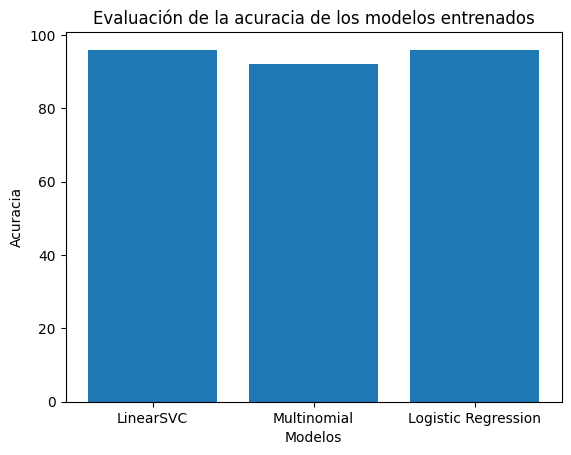

In [38]:
import matplotlib.pyplot as plt

# Datos
x = ["LinearSVC", "Multinomial","Logistic Regression"]
y = [96, 92,96]

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y)
plt.title('Evaluación de la acuracia de los modelos entrenados')
plt.xlabel('Modelos')
plt.ylabel('Acuracia')
plt.show()

In [43]:
    import joblib
    joblib.dump(modelo, 'modelo.pkl')
    modelo_creado = joblib.load('modelo.pkl')
    modelo_creado.predict(testear_x)
    predicciones2 = modelo_creado.predict(testear_x)
    acuracia = accuracy_score(testear_y, predicciones2) * 100
    print(f'la precision es %{acuracia:.2f}')

la precision es %96.00


In [44]:
import sklearn
sklearn.__version__

'1.7.2'